All the code for the FIT3139 Report by Lohith Karthesan 33861498
----------------------------------------------------------------------------------

In [4]:
import random as random
import numpy as np
import matplotlib.pyplot as plt


# Defining the Transition Matrix for Random Bet Selection
P = np.array([
    
    [1.0,    0.0,    0.0,    0.0,    0.0,     0.0,    0.0,    0.0,    0.0],  # Win
    [0.425, 0.0,    0.1625,   0.15,  0.1375,  0.125,    0.0,    0.0,    0.0],  # 7
    [0.15,   0.275,  0,  0.225,    0.1625,  0.1875, 0.0,    0.0,    0.0],  # 6
    [0.1375, 0.1,    0.175,  0.0,    0.075,   0.15,   0.2,    0.0,    0.1625],# 5
    [0.0625, 0.075,  0.1,    0.1875, 0.0,     0.2375, 0.15,   0.0,    0.1875],# 4
    [0.025,  0.0,    0.05,   0.1125, 0.1875,  0.0,    0.0625, 0.3375,    0.225], # 3
    [0.025,  0.0,    0.0,    0.0625, 0.1,     0.1375, 0.0,    0.3,    0.375], # 2
    [0.0125, 0.0,    0.0,    0.0,    0.0625,  0.1,    0.15,   0.0,    0.675], # 1
    [0.0,    0.0,    0.0,    0.0,    0.0,     0.0,    0.0,    0.0,    1.0]    # Lose
])

# Function from ChatGPT to convert a Matrix into Canonical Form
def to_canonical_form(T):
    """
    Convert a transition matrix T into canonical form:  
    [ Q | R ]
    [ 0 | I ]
    """
    diag = np.diag(T)
    absorbing = np.where(diag == 1)[0]
    transient = np.where(diag != 1)[0]

    # New row/col order: transient first, then absorbing
    order = np.concatenate([transient, absorbing])
    
    # Apply row and column reordering
    T_canonical = T[np.ix_(order, order)]
    
    return T_canonical, order


Canonical, Order = to_canonical_form(P)





Finding the likelihood of being in the winning state after n number of bets played. 
Matrix Exponentiation of the transition matrix for the number of steps we're looking for
----------------------------------------------------------------------------------

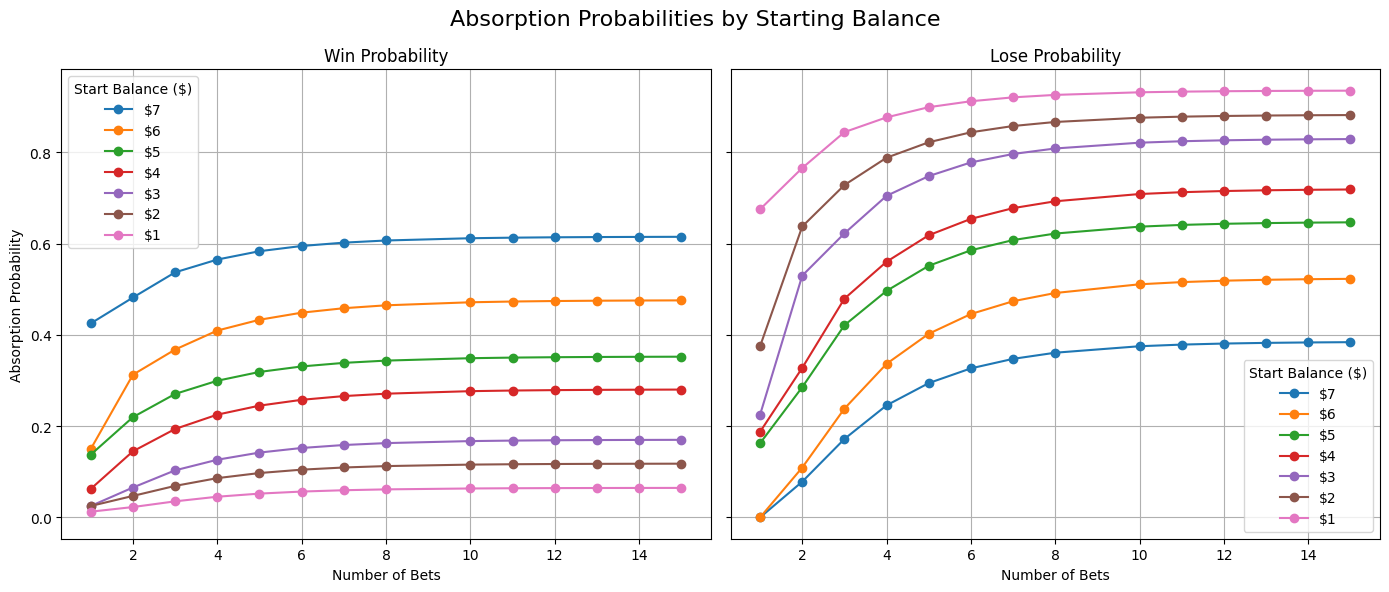

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# For reference, the indexing is backwards, index does not match balance
# Index:     0     1     2     3     4     5     6     7     8
# State:    Win   $7    $6    $5    $4    $3    $2    $1    Lose

steps = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]
win_state = 0
lose_state = 8

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  #  side-by-side plots

# Looping through, plotting the probabilties for winning or losing for each balance
# idx is the index of the balance states 
for idx in range(1, 8):
    start_state = idx
    actual_balance = 8 - start_state

    win_probs = []
    for step in steps:
        P_power = np.linalg.matrix_power(P, step)
        win_prob = P_power[start_state, win_state]
        win_probs.append(win_prob)
    axes[0].plot(steps, win_probs, marker='o', label=f'${actual_balance}')

    # Lose probs
    lose_probs = []
    for step in steps:
        P_power = np.linalg.matrix_power(P, step)
        lose_prob = P_power[start_state, lose_state]
        lose_probs.append(lose_prob)
    axes[1].plot(steps, lose_probs, marker='o', label=f'${actual_balance}')

# Left plot: WIN
axes[0].set_title("Win Probability")
axes[0].set_xlabel("Number of Bets")
axes[0].set_ylabel("Absorption Probability")
axes[0].legend(title="Start Balance ($)")
axes[0].grid(True)

# Right plot: LOSE
axes[1].set_title("Lose Probability")
axes[1].set_xlabel("Number of Bets")
axes[1].legend(title="Start Balance ($)")
axes[1].grid(True)

plt.suptitle("Absorption Probabilities by Starting Balance", fontsize=16)
plt.tight_layout()
plt.show()


Calculating and Graphing the
Expected number of bets played before absorption
----------------------------------------------------------------------------------

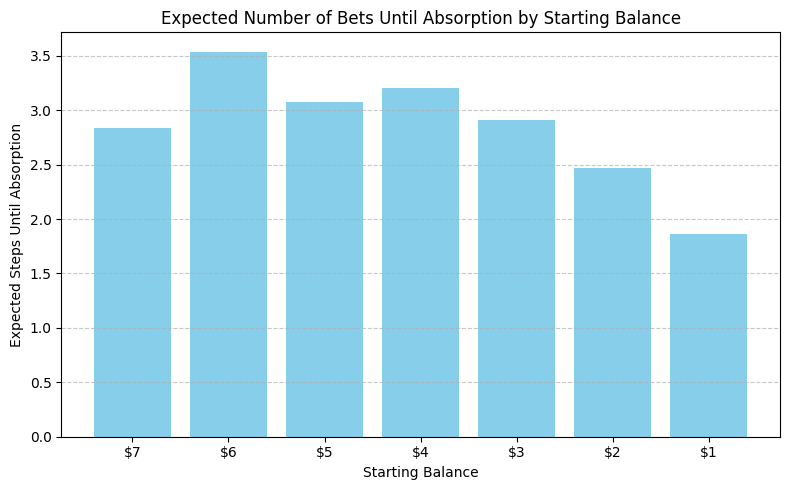

In [8]:

# Extract Q and R
num_transient = len(np.where(np.diag(Canonical) != 1)[0])
Q = Canonical[:num_transient, :num_transient]
R = Canonical[:num_transient, num_transient:]

# Compute fundamental matrix N
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# Compute absorption probabilities B = N * R
B = np.dot(N,R)


# Compute expected absorption times: t = N * 1_vectors
t = N @ np.ones((N.shape[1], 1))
# print(t)

# Define the correct balance labels in order matching t
balances = [7, 6, 5, 4, 3, 2, 1]  # These match the order of t

# Flatten t from a (7,1) array to a 1D list of values
absorption_times = t.flatten()

plt.figure(figsize=(8, 5))
plt.bar([f"${b}" for b in balances], absorption_times, color='skyblue')

plt.xlabel("Starting Balance")
plt.ylabel("Expected Steps Until Absorption")
plt.title("Expected Number of Bets Until Absorption by Starting Balance")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Graphing the probability of winning or losing based on the starting balance
----------------------------------------------------------------------------------

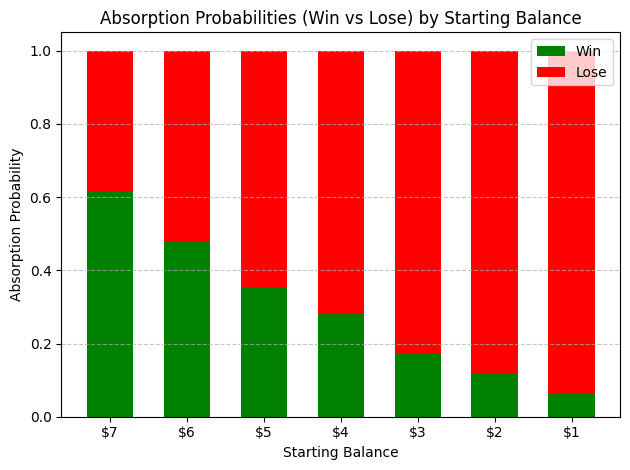

In [10]:
## Note Running this Individually will cause Errors, must run from the top 

import matplotlib.pyplot as plt
import numpy as np

# B is already computed from B = N @ R in the previous segment 
# Each row of B corresponds to a starting state ($7 to $1) and contains [Win_prob, Lose_prob]

balances = [7, 6, 5, 4, 3, 2, 1]  # Match transient state rows to actual $ balances
win_probs = B[:, 0]  # First column is Win absorption probability
lose_probs = B[:, 1]  # Second column is Lose absorption probability

# print(B) to look at the matrix 

x = np.arange(len(balances))  # x-axis positions
width = 0.6

# Plot stacked bar chart
plt.bar(x, win_probs, width, label='Win', color='green')
plt.bar(x, lose_probs, width, bottom=win_probs, label='Lose', color='red')

# Labels and title
plt.xticks(x, [f"${b}" for b in balances])
plt.xlabel("Starting Balance")
plt.ylabel("Absorption Probability")
plt.title("Absorption Probabilities (Win vs Lose) by Starting Balance")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Using Monte Carlo Simulation from each balance and graphing win and loss outcomes
----------------------------------------------------------------------------------

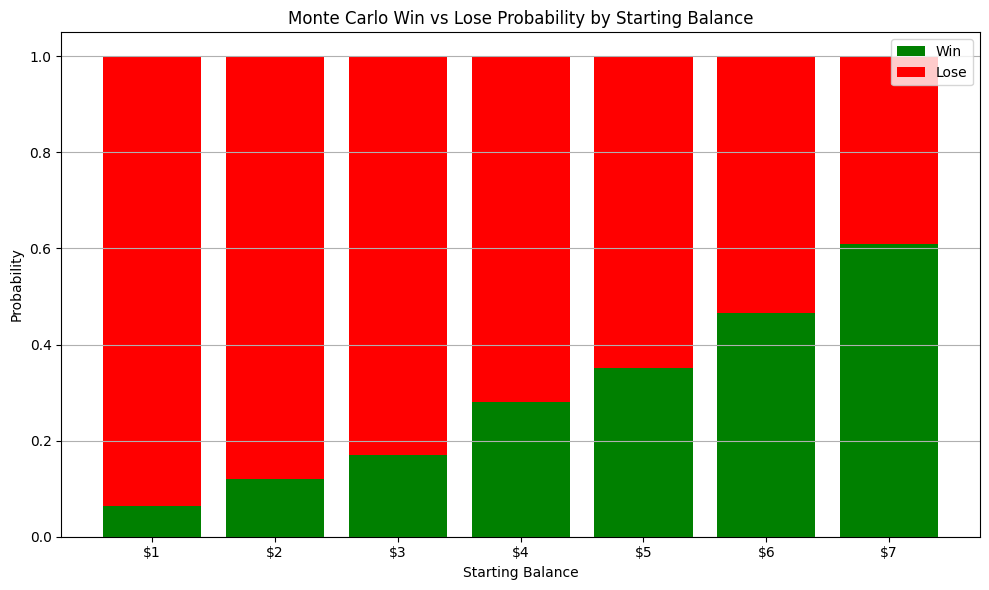

In [12]:
# Balance index map mapping the balances to their index 
balance_to_index = {
    1: 7,
    2: 6,
    3: 5,
    4: 4,
    5: 3,
    6: 2,
    7: 1
}

np.random.seed(42)  # To reproduce

def simulate_game(P, start_state, max_steps=100):
    state = start_state
    for step in range(max_steps):
        row = P[state]
        # row = row / np.sum(row)  # Ensure row sums to 1
        state = np.random.choice(len(P), p=row)
        if state == 0 or state == 8:
            return state, step + 1
    return state, max_steps

# Store results
results = {bal: {"win": 0, "lose": 0, "steps": []} for bal in balance_to_index}

# Run simulations
for balance in balance_to_index:
    start = balance_to_index[balance]
    for _ in range(10000):
        end_state, steps = simulate_game(P, start)
        if end_state == 0:
            results[balance]["win"] += 1
        elif end_state == 8:
            results[balance]["lose"] += 1
        results[balance]["steps"].append(steps)

# Visualise win/lose rates
balances = list(results.keys())
wins = [results[b]["win"] for b in balances]
losses = [results[b]["lose"] for b in balances]

win_rate = [w / (w + l) for w, l in zip(wins, losses)]
lose_rate = [l / (w + l) for w, l in zip(wins, losses)]

x = np.arange(len(balances))
plt.figure(figsize=(10, 6))
plt.bar(x, win_rate, label="Win", color="green")
plt.bar(x, lose_rate, bottom=win_rate, label="Lose", color="red")
plt.xticks(x, [f"${b}" for b in balances])
plt.ylabel("Probability")
plt.xlabel("Starting Balance")
plt.title("Monte Carlo Win vs Lose Probability by Starting Balance")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Graphing the Spread of Absorption: Seeing how many steps it takes for each balance to be absorbed  
----------------------------------------------------------------------------------

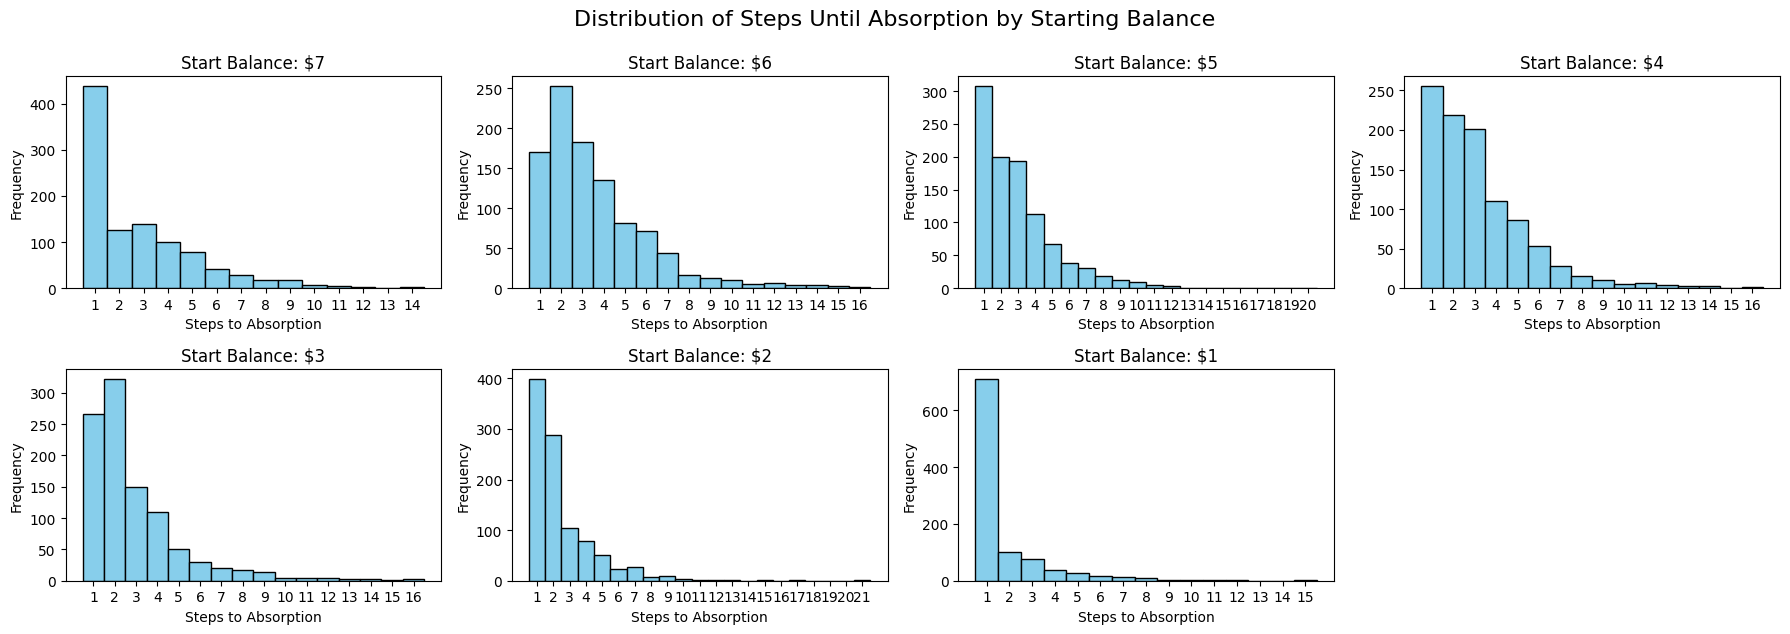

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo simulation function
def simulate_game(P, start_state, max_steps=100):
    state = start_state
    for step in range(max_steps):
        row = P[state]
        row = row / np.sum(row)  # Ensure row sums to 1
        state = np.random.choice(len(P), p=row)
        if state == 0 or state == 8:  # Absorbing states: Win or Lose
            return step + 1  # Include step that caused absorption
    return max_steps  # Not absorbed within limit

# Run simulations
results_steps = {balance: [] for balance in range(1, 8)}  # Index 1 ($7) to 7 ($1)

for start in range(1, 8):  # Loop through balance indices
    for _ in range(1000):
        steps = simulate_game(P, start)
        results_steps[start].append(steps)

# Plot histograms
fig, axs = plt.subplots(2, 4, figsize=(18, 6))
axs = axs.flatten()

for i, balance_index in enumerate(range(1, 8)):
    balance_label = 8 - balance_index  # Convert index to $ balance
    steps = results_steps[balance_index]
    
    axs[i].hist(steps, bins=np.arange(1, max(steps)+2)-0.5, color='skyblue', edgecolor='black')
    axs[i].set_title(f"Start Balance: ${balance_label}")
    axs[i].set_xlabel("Steps to Absorption")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xticks(range(1, max(steps)+1))

# Remove last unused subplot
fig.delaxes(axs[7])

# Final layout
plt.tight_layout()
plt.suptitle("Distribution of Steps Until Absorption by Starting Balance", fontsize=16, y=1.05)
plt.show()


Strategy Selection: Removing the Random Selection from the Model
----------------------------------------------------------------------------------

Selecting a Random Betting Strategy and Simulating with Monte Carlo to View Results

----------------------------------------------------------------------------------

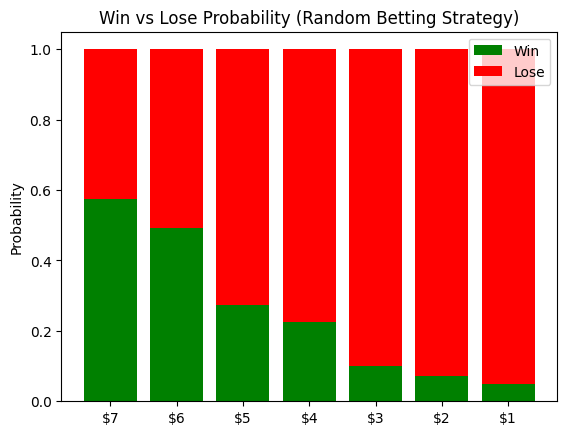

Balance $7: B
Balance $6: C
Balance $5: B
Balance $4: D
Balance $3: D
Balance $2: A
Balance $1: A


In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(33861498)
# Defining the Matrices for Selecting a Betting Strategy
A = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.35,  0.0,  0.65, 0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.6,  0,  0.4,  0.0,   0.0,  0.0,  0.0, 0.0],  # 6
    [0.0,   0.0,  0.7,  0.0,  0.3,   0.0,  0.0,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.4,  0,  0.0,   0.0,  0.6,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.0,  0.0,  0.75,   0.0,  0.25, 0.0, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.55,  0.0,  0.45, 0.0],# 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.6,  0.0,  0.4], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



B = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.4,   0.0,  0.0,  0.6,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.75, 0.0,  0.0, 0.0],  # 6
    [0.0,   0.4,  0.0,  0.0,  0.0,   0.6,  0.0,  0.0, 0.0],  # 5
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.75], # 4
    [0.0,   0.0,  0.0,  0.45, 0.0,   0.0,  0.0,  0.55, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.4,   0.0,  0.0,  0.0, 0.6],  # 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.4,  0.0,  0.0, 0.6],  # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



C = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.45,  0.0,  0.0,  0.0,  0.55,  0.0,  0.0,  0.0, 0.0],  # 7
    [0.35,  0.0,  0.0,  0.0,  0.65,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.2,   0.0,  0.0,  0.0,  0.0,   0.0,  0.8,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.0,  0.75, 0.0,   0.25, 0.0,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.2,  0.0,  0.0,   0.0,  0.0,  0.8, 0.0],  # 3
    [0.0,   0.0,  0.0,  0.25, 0.0,   0.0,  0.0,  0.75, 0.0], # 2
    [0.0,   0.0,  0.0,  0.0,  0.25,  0.0,  0.0,  0.0, 0.75], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])


D = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0],  # Win
    [0.5,   0.0,  0.0,  0.0,  0.0,  0.5,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.5,  0.0,  0.5,  0.0,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.35,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.65], # 5
    [0.0,   0.3,  0.0,  0.0,  0.0,  0.7,  0.0,  0.0, 0.0],  # 4
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 3
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 2
    [0.05,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.95], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 1.0]   # Lose
])



# Generate a random betting strategy (1 to 7)
def generate_random_strategy():
    matrices = [A, B, C, D]
    indices = np.random.choice(len(matrices), 7)
    return {i + 1: matrices[idx] for i, idx in enumerate(indices)}

# Simulate a game using the betting strategy
def simulate_game_strategy(start_state, strategy, max_steps=100):
    state = start_state
    for step in range(max_steps):
        matrix = strategy[state]
        row = matrix[state]
        row = row / np.sum(row)  # Ensure row sums to 1
        state = np.random.choice(len(row), p=row)
        if state == 0 or state == 8:
            return state
    return state

# Run simulations for each starting balance
def simulate_win_loss(strategy, num_simulations=1000):
    results = {i: {"win": 0, "lose": 0} for i in range(1, 8)}
    for balance in range(1, 8):
        for _ in range(num_simulations):
            result_state = simulate_game_strategy(balance, strategy)
            if result_state == 0:
                results[balance]["win"] += 1
            elif result_state == 8:
                results[balance]["lose"] += 1
    return results

# Visualise results
def plot_results(results):
    balances = [8 - b for b in results.keys()]
    wins = [results[b]["win"] for b in results]
    losses = [results[b]["lose"] for b in results]

    win_rates = [w / (w + l) for w, l in zip(wins, losses)]
    lose_rates = [l / (w + l) for w, l in zip(wins, losses)]

    x = np.arange(len(balances))
    plt.bar(x, win_rates, label="Win", color='green')
    plt.bar(x, lose_rates, bottom=win_rates, label="Lose", color='red')
    plt.xticks(x, [f"${b}" for b in balances])
    plt.ylabel("Probability")
    plt.title("Win vs Lose Probability (Random Betting Strategy)")
    plt.legend()
    plt.show()

# Function from ChatGPT to Convert the Indexes into a nicely printed strategy
def identify_strategy_verbose(betting_strategy):
    known_matrices = {'A': A, 'B': B, 'C': C, 'D': D}
    balance_to_letter = []

    for index in range(1, 8):  # Index 1 → Balance $7 ... Index 7 → Balance $1
        current_matrix = betting_strategy[index]
        found = False
        for label, known_matrix in known_matrices.items():
            if np.allclose(current_matrix, known_matrix):
                balance = 8 - index  # Convert index to balance
                balance_to_letter.append(f"Balance ${balance}: {label}")
                found = True
                break
        if not found:
            balance = 8 - index
            balance_to_letter.append(f"Balance ${balance}: ?")  # Unknown matrix

    return "\n".join(balance_to_letter)



# Run it all
strategy = generate_random_strategy()
results = simulate_win_loss(strategy, num_simulations=1000)
plot_results(results)

# Print the matrix strategy string
print(identify_strategy_verbose(strategy))


Simulated Annealing 
----------------------------------------------------------------------------------

Using the starting state or balance of $4 
Simulate 10 steps from the balance of 4. 
We average final state over 100 simulations 
Maximise this average for random strategies 
Record the strategy
--------------------------------------------------------------------------------------------------------------------------------------------
NOTE: This can take some time to run sorry! Takes me about a 1 minute to run the whole workbook from scratch
--------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
# Balance index map
np.random.seed(33861498)

# Simulate a game using the betting strategy
def simulate_game_strategy(start_state,strategy,max_steps=10):
    state = start_state
    states_travelled = []
    states_travelled.append(state)
    for step in range(max_steps):
        matrix = strategy[state]
        row = matrix[state]
        state = np.random.choice(len(matrix[state]), p=row)
        states_travelled.append(state)
        if state == 0 or state == 8:
            return state, step + 1
    return state, max_steps
    
# Generate a random betting strategy (1 to 7)
def generate_perturbed_solution():
    matrices = [A, B, C, D]
    indices = np.random.choice(len(matrices), 7)  # pick 7 integers from 0 to 3
    return {i + 1: matrices[idx] for i, idx in enumerate(indices)}

# Run 100 simulations and take the Average Final State
def strategy_average(current_strategy, initial_state=4):
    end_states = np.array([])
    for _ in range(100):
                end_state, steps = simulate_game_strategy(initial_state, current_strategy)
                end_states = np.append(end_states, end_state)
    return (np.mean(end_states))

# Perform Simulated Annealing Maximising the Average Final State after 10 bets. 
# Code taken from Workshop 
def simulated_annealing(perturbations_per_annealing_step, t0, cooling_factor):
    assert t0 > 0 
    assert 0 < cooling_factor < 1
    current_strategy = generate_perturbed_solution()
    t = t0
    while abs(t) > 0.001:
        for _ in range(perturbations_per_annealing_step):

            current_value = strategy_average(current_strategy)
            
            perturbed_strategy = generate_perturbed_solution()
            perturbation_value = strategy_average(perturbed_strategy)
            
            delta = perturbation_value - current_value
            
            if delta > 0: 
                # perturbation is better, so take it
                current_solution = perturbed_strategy
                current_value = perturbation_value
            elif np.random.rand() < np.exp(delta/t): 
                # perturbation is worse,
                 #but I may take it depending on temp
                current_solution = perturbed_strategy 
                # go random for large temp, 
                #don't for small
                current_value = perturbation_value    
        t = cooling_factor*t
    return  current_solution, strategy_average(current_strategy)

    
solution, value = simulated_annealing(100, 50, 0.9)


# To identify the strategy:
# Define all your known matrices
known_matrices = {'A': A, 'B': B, 'C': C, 'D': D}


print("The strategy that maximises average final state via simulated is")
print(identify_strategy_verbose(solution))
print(value, "is the maximised average")



The strategy that maximises average final state via simulated is
Balance $7: A
Balance $6: D
Balance $5: B
Balance $4: A
Balance $3: D
Balance $2: B
Balance $1: D
6.56 is the maximised average


Using the strategy that was identified 
Visualise the results to evaluate how well the strategy performs. 
Simulate this from all balances  
-----------------------

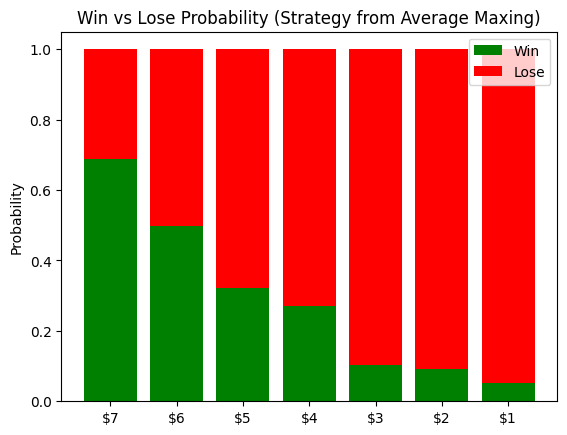

In [21]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(33861498)

# Define matrices A, B, C, D
A = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.35,  0.0,  0.65, 0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.6,  0,  0.4,  0.0,   0.0,  0.0,  0.0, 0.0],  # 6
    [0.0,   0.0,  0.7,  0.0,  0.3,   0.0,  0.0,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.4,  0,  0.0,   0.0,  0.6,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.0,  0.0,  0.75,   0.0,  0.25, 0.0, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.55,  0.0,  0.45, 0.0],# 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.6,  0.0,  0.4], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



B = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.4,   0.0,  0.0,  0.6,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.75, 0.0,  0.0, 0.0],  # 6
    [0.0,   0.4,  0.0,  0.0,  0.0,   0.6,  0.0,  0.0, 0.0],  # 5
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.75], # 4
    [0.0,   0.0,  0.0,  0.45, 0.0,   0.0,  0.0,  0.55, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.4,   0.0,  0.0,  0.0, 0.6],  # 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.4,  0.0,  0.0, 0.6],  # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



C = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.45,  0.0,  0.0,  0.0,  0.55,  0.0,  0.0,  0.0, 0.0],  # 7
    [0.35,  0.0,  0.0,  0.0,  0.65,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.2,   0.0,  0.0,  0.0,  0.0,   0.0,  0.8,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.0,  0.75, 0.0,   0.25, 0.0,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.2,  0.0,  0.0,   0.0,  0.0,  0.8, 0.0],  # 3
    [0.0,   0.0,  0.0,  0.25, 0.0,   0.0,  0.0,  0.75, 0.0], # 2
    [0.0,   0.0,  0.0,  0.0,  0.25,  0.0,  0.0,  0.0, 0.75], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])


D = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0],  # Win
    [0.5,   0.0,  0.0,  0.0,  0.0,  0.5,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.5,  0.0,  0.5,  0.0,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.35,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.65], # 5
    [0.0,   0.3,  0.0,  0.0,  0.0,  0.7,  0.0,  0.0, 0.0],  # 4
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 3
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 2
    [0.05,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.95], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 1.0]   # Lose
])




# Strategy: ADBADBD # THIS IS DEFINED BY INDEX, The balance of index 1 is actually $7 ie we play D at $7
strategy = {
    1: A,
    2:D,
    3: B,
    4: A,
    5: D,
    6: B,
    7: D
}

# Simulate a game using the betting strategy
def simulate_game_strategy(start_state, strategy, max_steps=100):
    state = start_state
    for _ in range(max_steps):
        row = strategy[state][state]
        row = row / np.sum(row)
        state = np.random.choice(len(row), p=row)
        if state == 0 or state == 8:
            return state
    return state

# Simulate a game 1000s of times for each balance recording the number of wins and losses
def simulate_win_loss(strategy, num_simulations=1000):
    results = {i: {"win": 0, "lose": 0} for i in range(1, 8)}
    for balance in range(1, 8):
        for _ in range(num_simulations):
            result_state = simulate_game_strategy(balance, strategy)
            if result_state == 0:
                results[balance]["win"] += 1
            elif result_state == 8:
                results[balance]["lose"] += 1
    return results

# Visualise Results
def plot_results(results):
    balances = [8 - b for b in results.keys()]
    wins = [results[b]["win"] for b in results]
    losses = [results[b]["lose"] for b in results]

    win_rates = [w / (w + l) for w, l in zip(wins, losses)]
    lose_rates = [l / (w + l) for w, l in zip(wins, losses)]

    x = np.arange(len(balances))
    plt.bar(x, win_rates, label="Win", color='green')
    plt.bar(x, lose_rates, bottom=win_rates, label="Lose", color='red')
    plt.xticks(x, [f"${b}" for b in balances])
    plt.ylabel("Probability")
    plt.title("Win vs Lose Probability (Strategy from Average Maxing)")
    plt.legend()
    plt.show()

results = simulate_win_loss(strategy)
plot_results(results)


Altering the Simulated Annealing Process
Instead of focusing on maximising average final state after 10 bets
Run games until an outcome is obtained and maximise number of wins
Test with just a starting balance of 4 again
----------------

NOTE: This can take some time to run sorry! Takes me about a 1 minute to run the whole workbook from scratch
-----

In [23]:
np.random.seed(33861498)


matrices = [A, B, C, D]
known_matrices = {'A': A, 'B': B, 'C': C, 'D': D}

# Generate a random betting strategy: matrix for each balance (1 to 7) 
def generate_perturbed_solution():
    indices = np.random.choice(len(matrices), 7)
    return {i + 1: matrices[idx] for i, idx in enumerate(indices)}

# Simulate until absorption (win = 0 or loss = 8), start at balance 4
def simulate_game_strategy(start_state, strategy, max_steps=500):
    state = start_state
    for _ in range(max_steps):
        matrix = strategy.get(state)
        if matrix is None:
            break  # shouldn't happen
        row = matrix[state]
        state = np.random.choice(len(row), p=row)
        if state == 0 or state == 8:
            return state  # Win or Lose
    return state  # In case we hit max steps

# Evaluate strategy: count number of wins from balance 4 
def count_wins(strategy, n=100):
    wins = 0
    for _ in range(n):
        final = simulate_game_strategy(4, strategy) ## we pass in 4 as the parameter
        if final == 0:
            wins += 1
    return wins

# Simulated Annealing focused on maximising wins now
def simulated_annealing(perturbations_per_step, t0, cooling_factor):
    current_strategy = generate_perturbed_solution()
    current_score = count_wins(current_strategy)
    t = t0

    while t > 0.001:
        for _ in range(perturbations_per_step):
            new_strategy = generate_perturbed_solution()
            new_score = count_wins(new_strategy)

            delta = new_score - current_score

            if delta > 0 or np.random.rand() < np.exp(delta / t):
                current_strategy = new_strategy
                current_score = new_score

        t *= cooling_factor

    return current_strategy, current_score

# Run it 
solution, total_wins = simulated_annealing(perturbations_per_step=100, t0=10, cooling_factor=0.9)
print("Best Strategy:") 
print(identify_strategy_verbose(solution))
print("Total Wins from Balance 4 (out of 100):", total_wins)


Best Strategy:
Balance $7: B
Balance $6: A
Balance $5: A
Balance $4: C
Balance $3: A
Balance $2: A
Balance $1: A
Total Wins from Balance 4 (out of 100): 96


Using the strategy that was identified 
Visualise the results to evaluate how well the strategy performs. 
Simulate this from all balances  
-----------------------

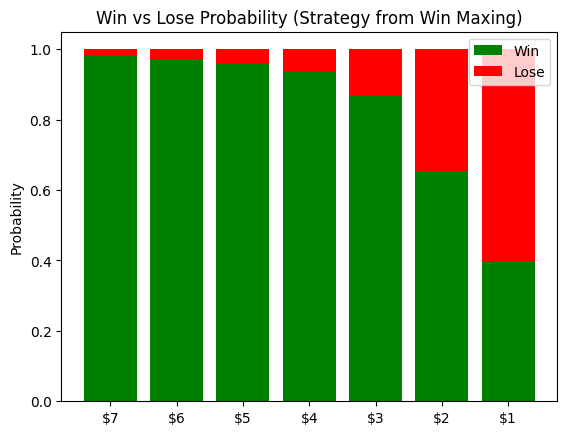

In [25]:
np.random.seed(33861498)

# Define matrices A, B, C, D
A = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.35,  0.0,  0.65, 0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.6,  0,  0.4,  0.0,   0.0,  0.0,  0.0, 0.0],  # 6
    [0.0,   0.0,  0.7,  0.0,  0.3,   0.0,  0.0,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.4,  0,  0.0,   0.0,  0.6,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.0,  0.0,  0.75,   0.0,  0.25, 0.0, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.55,  0.0,  0.45, 0.0],# 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.6,  0.0,  0.4], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



B = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.4,   0.0,  0.0,  0.6,  0.0,   0.0,  0.0,  0.0, 0.0],  # 7
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.75, 0.0,  0.0, 0.0],  # 6
    [0.0,   0.4,  0.0,  0.0,  0.0,   0.6,  0.0,  0.0, 0.0],  # 5
    [0.25,  0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.75], # 4
    [0.0,   0.0,  0.0,  0.45, 0.0,   0.0,  0.0,  0.55, 0.0], # 3
    [0.0,   0.0,  0.0,  0.0,  0.4,   0.0,  0.0,  0.0, 0.6],  # 2
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.4,  0.0,  0.0, 0.6],  # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])



C = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 0.0],  # Win
    [0.45,  0.0,  0.0,  0.0,  0.55,  0.0,  0.0,  0.0, 0.0],  # 7
    [0.35,  0.0,  0.0,  0.0,  0.65,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.2,   0.0,  0.0,  0.0,  0.0,   0.0,  0.8,  0.0, 0.0],  # 5
    [0.0,   0.0,  0.0,  0.75, 0.0,   0.25, 0.0,  0.0, 0.0],  # 4
    [0.0,   0.0,  0.2,  0.0,  0.0,   0.0,  0.0,  0.8, 0.0],  # 3
    [0.0,   0.0,  0.0,  0.25, 0.0,   0.0,  0.0,  0.75, 0.0], # 2
    [0.0,   0.0,  0.0,  0.0,  0.25,  0.0,  0.0,  0.0, 0.75], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,   0.0,  0.0,  0.0, 1.0]   # Lose
])


D = np.array([
    [1.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.0],  # Win
    [0.5,   0.0,  0.0,  0.0,  0.0,  0.5,  0.0,  0.0, 0.0],  # 7
    [0.0,   0.5,  0.0,  0.5,  0.0,  0.0,  0.0,  0.0, 0.0],  # 6
    [0.35,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.65], # 5
    [0.0,   0.3,  0.0,  0.0,  0.0,  0.7,  0.0,  0.0, 0.0],  # 4
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 3
    [0.1,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.9],  # 2
    [0.05,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.95], # 1
    [0.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 1.0]   # Lose
])




strategy = {
    1: B,
    2: A,
    3: A,
    4: C,
    5: A,
    6: A,
    7: A
}


def simulate_game_strategy(start_state, strategy, max_steps=100):
    state = start_state
    for _ in range(max_steps):
        row = strategy[state][state]
        row = row / np.sum(row)
        state = np.random.choice(len(row), p=row)
        if state == 0 or state == 8:
            return state
    return state

def simulate_win_loss(strategy, num_simulations=1000):
    results = {i: {"win": 0, "lose": 0} for i in range(1, 8)}
    for balance in range(1, 8):
        for _ in range(num_simulations):
            result_state = simulate_game_strategy(balance, strategy)
            if result_state == 0:
                results[balance]["win"] += 1
            elif result_state == 8:
                results[balance]["lose"] += 1
    return results

def plot_results(results):
    balances = [8 - b for b in results.keys()]
    wins = [results[b]["win"] for b in results]
    losses = [results[b]["lose"] for b in results]

    win_rates = [w / (w + l) for w, l in zip(wins, losses)]
    lose_rates = [l / (w + l) for w, l in zip(wins, losses)]

    x = np.arange(len(balances))
    plt.bar(x, win_rates, label="Win", color='green')
    plt.bar(x, lose_rates, bottom=win_rates, label="Lose", color='red')
    plt.xticks(x, [f"${b}" for b in balances])
    plt.ylabel("Probability")
    plt.title("Win vs Lose Probability (Strategy from Win Maxing)")
    plt.legend()
    plt.show()

results = simulate_win_loss(strategy)
plot_results(results)


Using this winning strategy, we visualise how absorption takes place depending on starting balance 
-----------------------

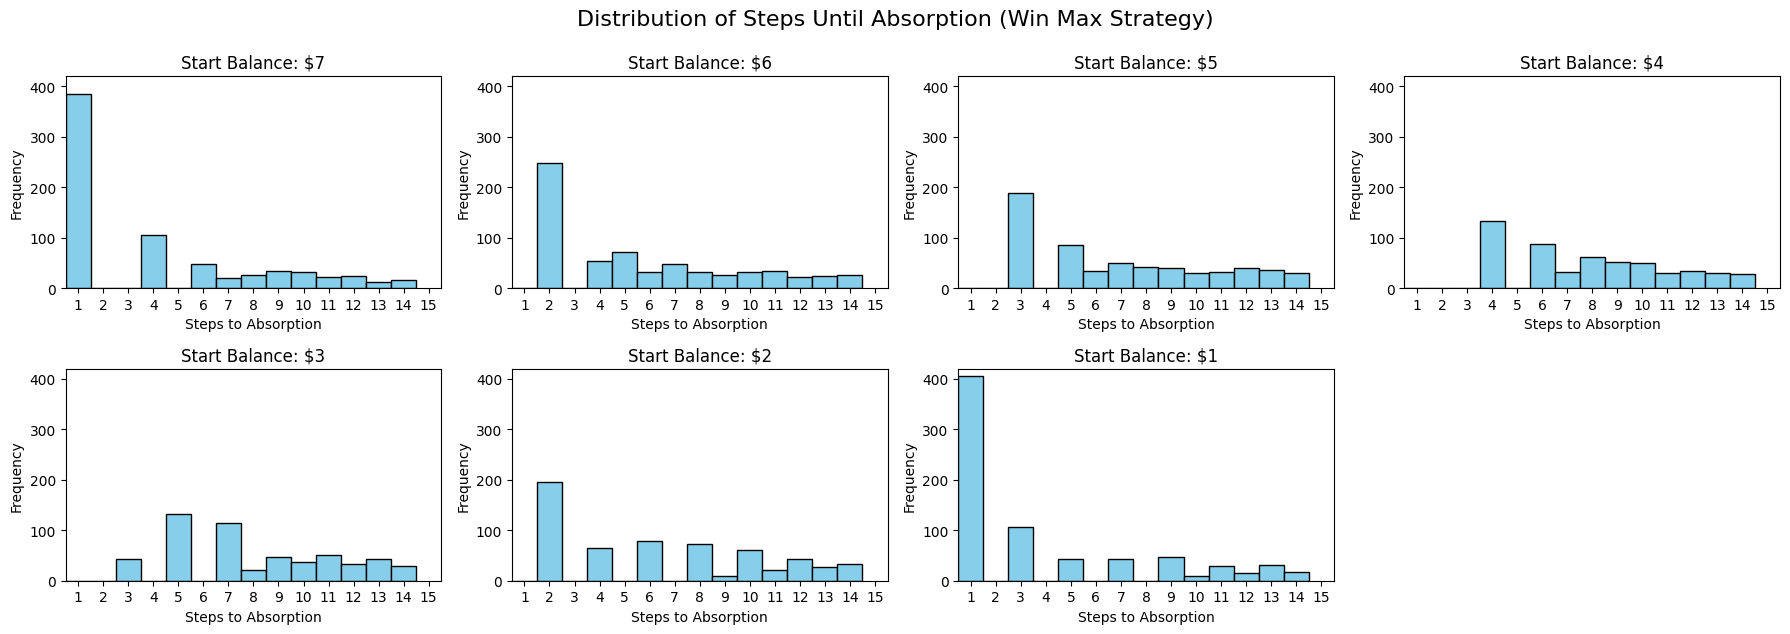

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(33861498)

# Define matrices A, B, C, D


strategy = {
    1: B,
    2: A,
    3: A,
    4: C,
    5: A,
    6: A,
    7: A
}

# Simulate game steps until absorption
def simulate_game_strategy_steps(start_state, strategy, max_steps=100):
    state = start_state
    for step in range(max_steps):
        row = strategy[state][state]
        row = row / np.sum(row)
        state = np.random.choice(len(row), p=row)
        if state == 0 or state == 8:
            return step + 1
    return max_steps

# Collect step distributions for each balance
results_steps = {balance: [] for balance in range(1, 8)}
for start in range(1, 8):
    for _ in range(1000):
        steps = simulate_game_strategy_steps(start, strategy)
        results_steps[start].append(steps)

# Plot histograms
fig, axs = plt.subplots(2, 4, figsize=(18, 6))
axs = axs.flatten()

for i, balance_index in enumerate(range(1, 8)):
    balance_label = 8 - balance_index
    steps = results_steps[balance_index]

    axs[i].hist(steps, bins=np.arange(1, 16) - 0.5, color='skyblue', edgecolor='black')  # cut off after 15
    axs[i].set_title(f"Start Balance: ${balance_label}")
    axs[i].set_xlabel("Steps to Absorption")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xticks(range(1, 16))           # cleaner x-axis
    axs[i].set_xlim(0.5, 15.5)                # x-limit to improve readability
    axs[i].set_ylim(0, 420)                   # unify y-axis across plots (optional)

fig.delaxes(axs[7])  # Remove unused 8th subplot
plt.tight_layout()
plt.suptitle("Distribution of Steps Until Absorption (Win Max Strategy)", fontsize=16, y=1.05)
plt.show()

